How do you evaluate the apt Price for a second hand car?

You look at the number of years, the type of fuel, how many KMS it has run etc.

In this case study, your task is to create a machine learning model which can predict the Price of a car based on its specs.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "CarPricesData.csv". This file contains 1435 car prices data.

## Data description
The business meaning of each column in the data is as below. This is present as
an excel file named Data Dictionary / Business Dictionary

* <b>Price</b>: The Price of the car in dollars
* <b>Age</b>: The age of the car in months
* <b>KM</b>: How many KMS did the car was used
* <b>FuelType</b>: Petrol/Diesel/CNG car
* <b>HP</b>: Horse power of the car
* <b>MetColor</b>: Whether car has metallic color or not
* <b>Automatic</b>: Whether car has automatic transmission or not
* <b>CC</b>: The engine size of the car
* <b>Doors</b>: The number of doors in the car
* <b>Weight</b>: The weight of the car

In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('CarPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarPricesData.shape)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CarPricesData.head(10)

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


# Defining the problem statement: 
#### Create a ML model which can predict the apt Price of a Car
* Target Variable: Price
* Predictors: Age, KM, FuelType, CC etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

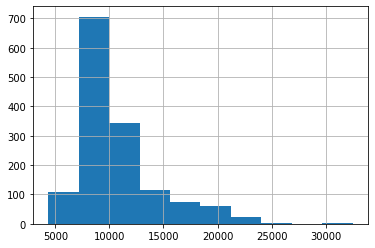

In [6]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Price of the computer?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [7]:
# Looking at sample rows in the data
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
Price        1435 non-null int64
Age          1433 non-null float64
KM           1435 non-null int64
FuelType     1431 non-null object
HP           1435 non-null int64
MetColor     1435 non-null int64
Automatic    1435 non-null int64
CC           1433 non-null float64
Doors        1435 non-null int64
Weight       1433 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [9]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Price</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>Age</b>: Continuous. Selected.
* <b>KM</b>: Continuous. Selected.
* <b>FuelType</b>: Categorical. Selected.
* <b>HP</b>: Categorical. Selected.
* <b>MetColor</b>: Categorical. Selected.
* <b>Automatic</b>: Categorical. Selected.
* <b>CC</b>: Categorical. Selected.
* <b>Doors</b>: Categorical. Selected.
* <b>Weight</b>: Continuous. Selected.

# Removing useless columns from the data

There are no qualitative columns in this data

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

<b>Categorical Predictors: </b>

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

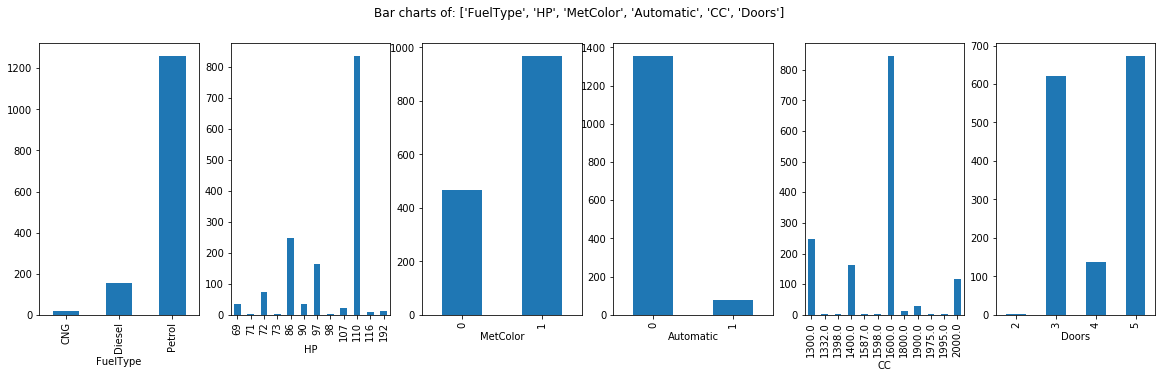

In [12]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dd260d0>,
      dtype=object)

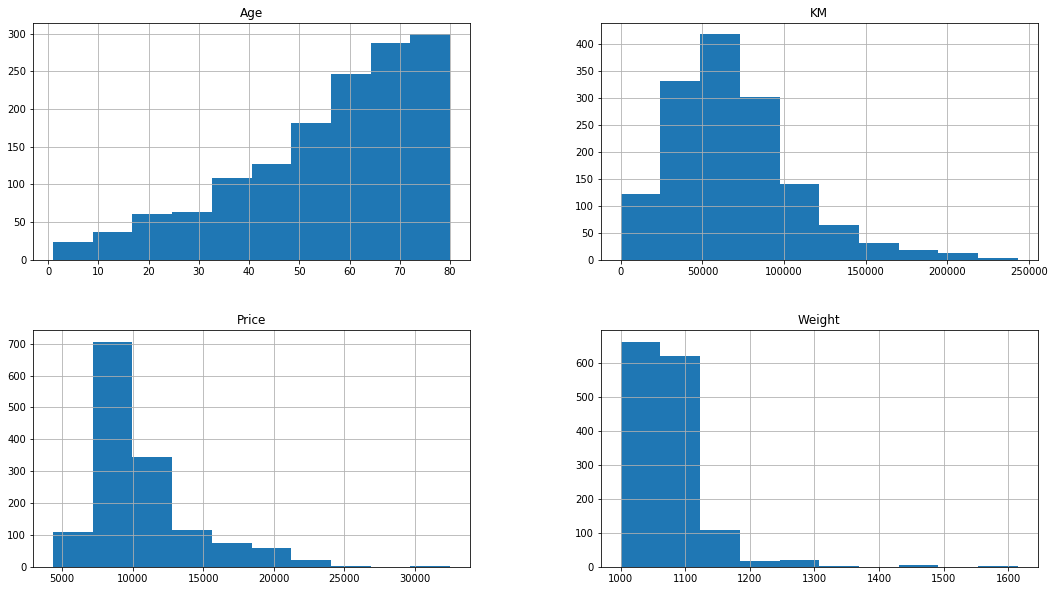

In [13]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age','KM','Weight'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 300 rows in data that has a value between 70 to 80.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Price</b> : Selected. The distribution is good. Outliers are seen near 30000, need to treat them
* <b>KM</b>: Selected. The distribution is good.
* <b>Age</b>: Selected. The distribution is good.
* <b>Weight</b>: Selected. The distribution is good. Outliers are seen beyond 1400, need to treat them.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Treating outliers for 'Weight' column

In [14]:
# Counting the number of rows having outliers
len(CarPricesData['Weight'][CarPricesData['Weight']>1400])

5

In [15]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

138     1320.0
112     1320.0
115     1280.0
68      1275.0
119     1275.0
         ...  
690     1000.0
1410    1000.0
957     1000.0
927     1000.0
1000    1000.0
Name: Weight, Length: 1428, dtype: float64

Based on the above output, the nearest logical value is 1320, hence, replacing any value greater than 1400 with it.

In [16]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

## Treating outliers for Price column

In [17]:
CarPricesData['Price'][CarPricesData['Price']<29000].sort_values(ascending=False)

115     24990
112     24950
147     24500
141     23950
171     23750
        ...  
402      5150
192      4750
393      4450
1048     4400
191      4350
Name: Price, Length: 1432, dtype: int64

In [18]:
CarPricesData['Price'][CarPricesData['Price']>29000]=24990

# Visualizing the distribution again after outlier treatment

In [19]:
CarPricesData.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3643d0>,
      dtype=object)

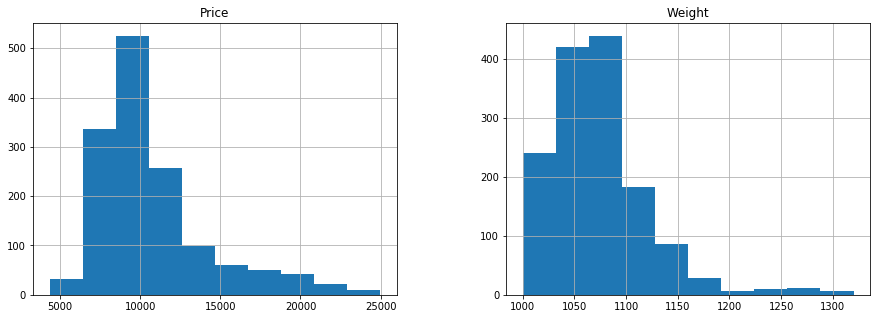

In [20]:
# Histogram for weight after outlier treatment
CarPricesData[['Weight', 'Price']].hist(figsize=(15,5))

The distribution has improved after the outlier treatment. There is still a tail on the right side, but it is thick, hence it is acceptable.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records

In [21]:
# Using Business Logic of other column
CarPricesData.groupby('FuelType')['CC'].mean()

FuelType
CNG       1599.882353
Diesel    1976.396104
Petrol    1516.058824
Name: CC, dtype: float64

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64


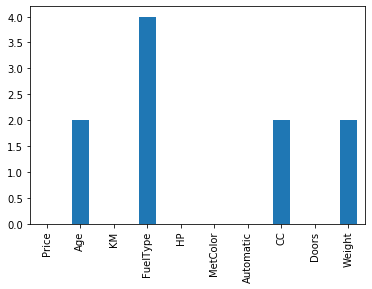

In [22]:
# Finding how many missing values are there for each column
print(CarPricesData.isnull().sum())
CarPricesData.isnull().sum().plot(kind='bar') # Added by Sreya!

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [23]:
CarPricesData['FuelType'].mode()

0    Petrol
dtype: object

In [24]:
CarPricesData['FuelType'].mode()[0]

'Petrol'

In [25]:
CarPricesData['Weight'].median()

1070.0

In [26]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [27]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [28]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## interpolation
Dont use it when there is skewness in the data

In [29]:
Age=pd.Series([20,30,np.NaN,np.NaN, 40, 25, np.NaN, 35])
Age

0    20.0
1    30.0
2     NaN
3     NaN
4    40.0
5    25.0
6     NaN
7    35.0
dtype: float64

In [30]:
Age.interpolate()

0    20.000000
1    30.000000
2    33.333333
3    36.666667
4    40.000000
5    25.000000
6    30.000000
7    35.000000
dtype: float64

In [31]:
Gender=pd.Series(['M','F',np.NaN, 'M', 'F', np.NaN, 'Z','O','A','B'])
Gender

0      M
1      F
2    NaN
3      M
4      F
5    NaN
6      Z
7      O
8      A
9      B
dtype: object

In [32]:
Gender.interpolate(method='ffill')

0    M
1    F
2    F
3    M
4    F
5    F
6    Z
7    O
8    A
9    B
dtype: object

In [33]:
# interpolating categorical data
#CarPricesData['FuelType'].interpolate(method='ffill', inplace=True)

In [34]:
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


# Feature Selection (Bi-Variate analysis)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

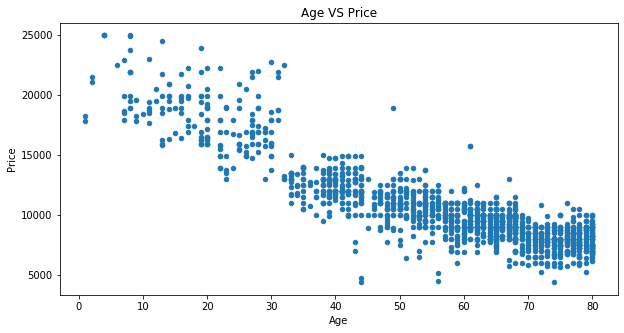

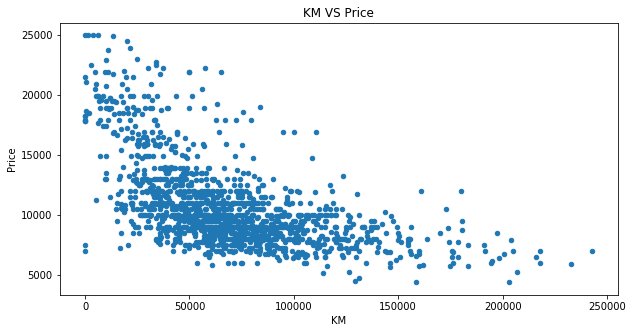

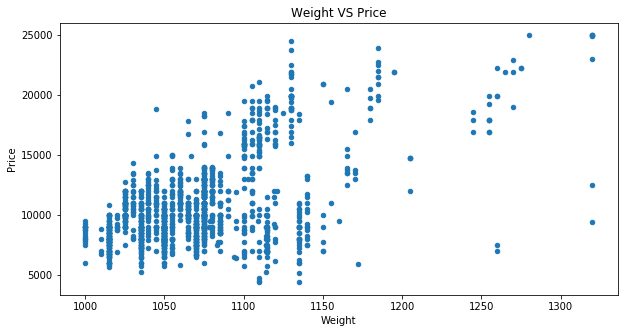

In [35]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

# Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

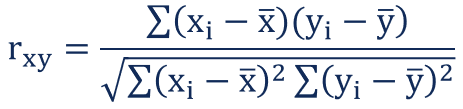

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [36]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.880043,-0.573402,0.580007
Age,-0.880043,1.000000,0.502604,-0.488324
KM,-0.573402,0.502604,1.000000,-0.013607
Weight,0.580007,-0.488324,-0.013607,1.000000


In [37]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5]

Price     1.000000
Age      -0.880043
KM       -0.573402
Weight    0.580007
Name: Price, dtype: float64

<b>Final selected Continuous columns:</b>

'Age','KM','Weight'

In [38]:
abs(CorrelationData['Price'])>0.5

Price     True
Age       True
KM        True
Weight    True
Name: Price, dtype: bool

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

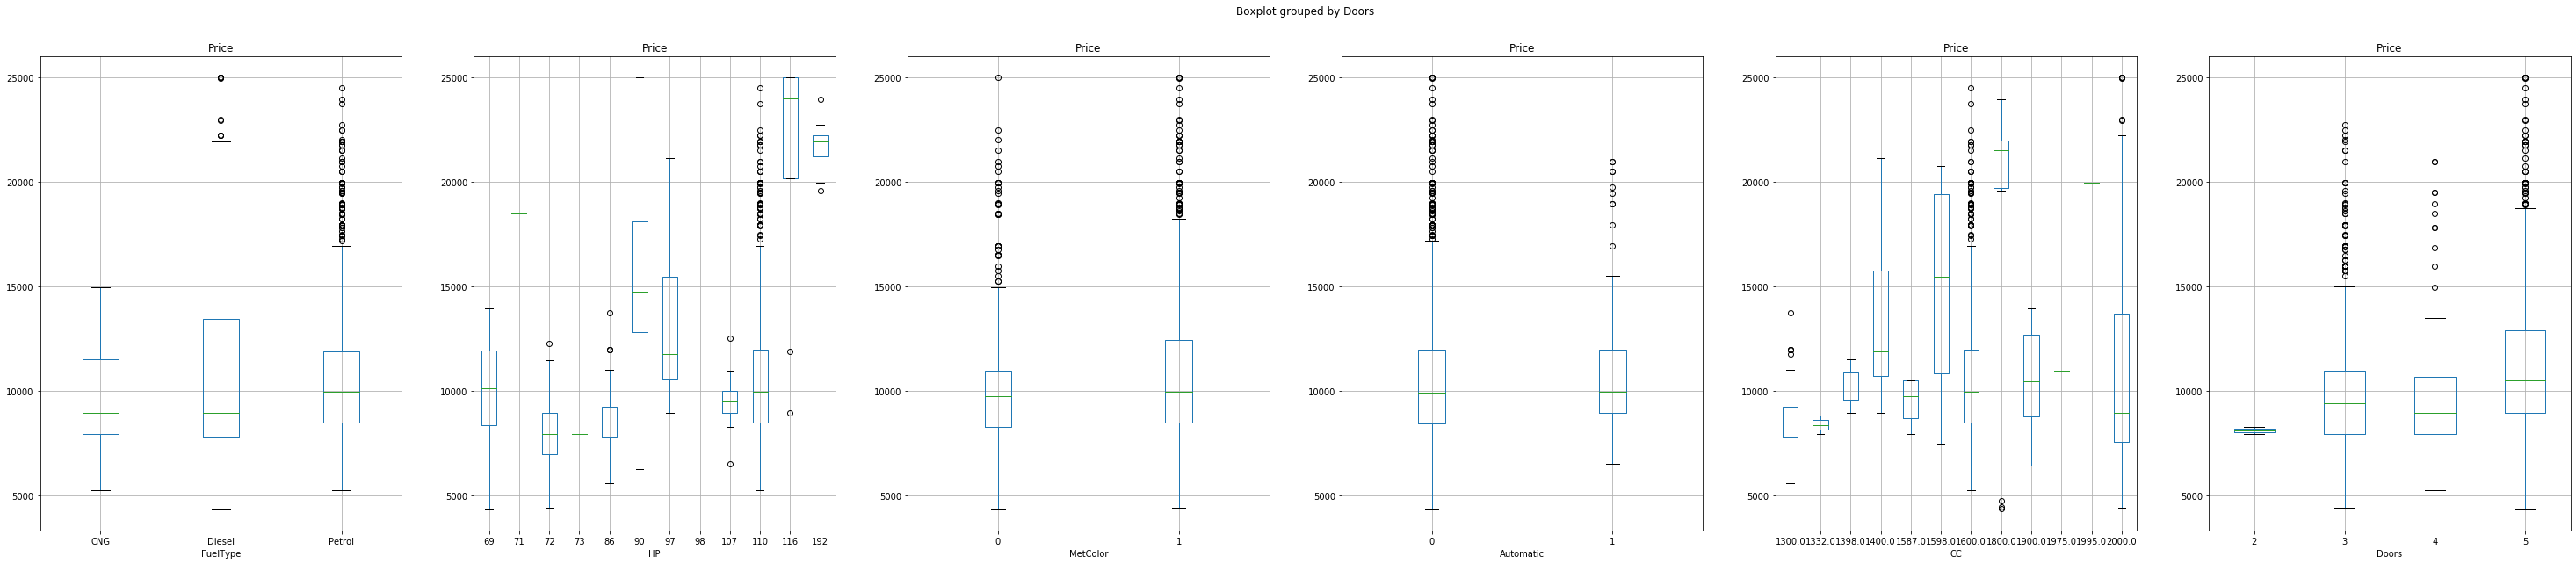

In [39]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarPricesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","Automatic" and "MetColor" they seems like a border cases, as the boxes are close to each other.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [40]:
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
CategoryGroupLists

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22500, 220...
Name: Price, dtype: object

In [41]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [42]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.13509668858708382
HP is correlated with Price | P-Value: 1.9274014078136855e-103
MetColor is correlated with Price | P-Value: 2.9082820205816128e-05
Automatic is NOT correlated with Price | P-Value: 0.17860614078485976
CC is correlated with Price | P-Value: 4.667580175740994e-49
Doors is correlated with Price | P-Value: 1.0200265373934503e-12


['HP', 'MetColor', 'CC', 'Doors']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "FuelType" and "Automatic". This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'HP', 'MetColor', 'CC', 'Doors'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [43]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [44]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [1]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

## Converting the binary nominal variable to numeric using 1/0 mapping

There is no binary nominal variable in string format to be converted

## Converting the nominal variable to numeric using get_dummies()

In [45]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CarPricesData['Price']

# Printing sample rows
DataForML_Numeric.head(20)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
5,32.0,61000,1170.0,90,0,2000.0,3,12950
6,27.0,94612,1245.0,90,1,2000.0,3,16900
7,30.0,75889,1245.0,90,1,2000.0,3,18600
8,27.0,19700,1185.0,192,0,1800.0,3,21500
9,23.0,71138,1105.0,69,0,1900.0,3,12950


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [44]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [56]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

# Simple Linear Regression (only one predictor)
#Predictors=['Age']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False)
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names()

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=343)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [55]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[    80.,   6400., 512000.],
       [    20.,    400.,   8000.],
       [    50.,   2500., 125000.],
       [    65.,   4225., 274625.],
       [    77.,   5929., 456533.],
       [    23.,    529.,  12167.],
       [    44.,   1936.,  85184.],
       [    63.,   3969., 250047.],
       [    55.,   3025., 166375.],
       [    27.,    729.,  19683.]])

In [76]:
y_train[0:10]

array([ 7145, 16450, 12200,  9950,  6750, 13500, 10950,  9950, 11500,
       21950])

# Multiple Linear Regression

In [77]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8647372814332572

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice        APE
0   8950          9334.0   4.290503
1   8250          9078.0  10.036364
2   8450          8744.0   3.479290
3   9450         10104.0   6.920635
4  12950         13007.0   0.440154
Mean Accuracy on test data: 90.80944951329451
Median Accuracy on test data: 92.60335195530726

Accuracy values for 10-fold Cross Validation:
 [90.44409532 89.56365325 88.73647401 92.02171842 89.47108843 91.81973698
 91.20551266 87.79318959 90.62790478 88.577706  ]

Final Average Accuracy of the model: 90.03


In [78]:
100* (abs(9837.0 - 8950)/8950)

9.910614525139664

In [79]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [80]:
TestingDataResults['PriceAVG']=TestingDataResults['Price'].mean()
TestingDataResults.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE,PriceAVG
0,61.0,81170.0,1040.0,110.0,1.0,1600.0,4.0,8950,9334.0,4.290503,10830.24826
1,64.0,91333.0,1050.0,110.0,1.0,1600.0,3.0,8250,9078.0,10.036364,10830.24826
2,65.0,80439.0,1035.0,110.0,1.0,1600.0,4.0,8450,8744.0,3.479290,10830.24826
3,66.0,58113.0,1085.0,107.0,1.0,1600.0,3.0,9450,10104.0,6.920635,10830.24826
4,44.0,37389.0,1080.0,110.0,1.0,1600.0,5.0,12950,13007.0,0.440154,10830.24826


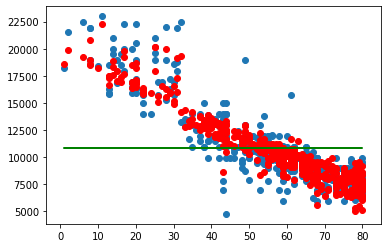

In [81]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Age'] , y=TestingDataResults['Price'])
plt.scatter(TestingDataResults['Age'] ,TestingDataResults['PredictedPrice'], color='red')
plt.plot(TestingDataResults['Age'] ,TestingDataResults['PriceAVG'], color='green')

In [64]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

In [82]:
# Looking at the coefficients for each column
LREG.coef_

array([-120.06150916,   -0.0155296 ,   24.26578355,   33.03991518,
         38.04803973,   -2.28032405,  -18.91534103])

In [83]:
# Looking at the intercept
LREG.intercept_

-7266.380704442381

In [67]:
# SLR Equation
# Price=-167.95(Age)+20082.18

In [68]:
# MLR Equation
# Price= -120.06(Age) -0.015(KM)....-7266

# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8611402676250091

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   8950          9380.0
1   8250          9380.0
2   8450          9380.0
3   9450          9380.0
4  12950         10834.0
Mean Accuracy on test data: 89.41985804272944
Median Accuracy on test data: 92.0

Accuracy values for 10-fold Cross Validation:
 [83.83497421 87.54092648 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]

Final Average Accuracy of the model: 87.88


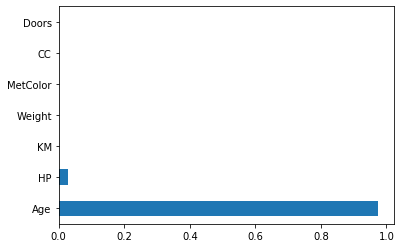

In [68]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [73]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt / people with mac run on terminal
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [74]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\fhashmi\\AppData\\Local\\Continuum\\Anaconda3\\Library\\bin\\graphviz'

In [75]:
np.var(y_train)

12069991.736238314

In [76]:
np.mean(y_train)

10699.647410358566

digraph Tree {
node [shape=box] ;
0 [label="Age <= 31.5\nmse = 12268124.455\nsamples = 1004\nvalue = 10654.255"] ;
1 [label="HP <= 113.0\nmse = 7497879.005\nsamples = 123\nvalue = 18266.659"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 17.5\nmse = 5399349.352\nsamples = 112\nvalue = 17788.652"] ;
1 -> 2 ;
3 [label="mse = 3818420.983\nsamples = 38\nvalue = 19630.263"] ;
2 -> 3 ;
4 [label="mse = 3575245.715\nsamples = 74\nvalue = 16842.959"] ;
2 -> 4 ;
5 [label="Age <= 20.5\nmse = 2850804.959\nsamples = 11\nvalue = 23133.636"] ;
1 -> 5 ;
6 [label="mse = 603733.333\nsamples = 6\nvalue = 24470.0"] ;
5 -> 6 ;
7 [label="mse = 832600.0\nsamples = 5\nvalue = 21530.0"] ;
5 -> 7 ;
8 [label="Age <= 55.5\nmse = 3714124.371\nsamples = 881\nvalue = 9591.456"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="Age <= 43.5\nmse = 2350687.883\nsamples = 281\nvalue = 11491.562"] ;
8 -> 9 ;
10 [label="mse = 1401312.16\nsamples = 120\nvalue = 1

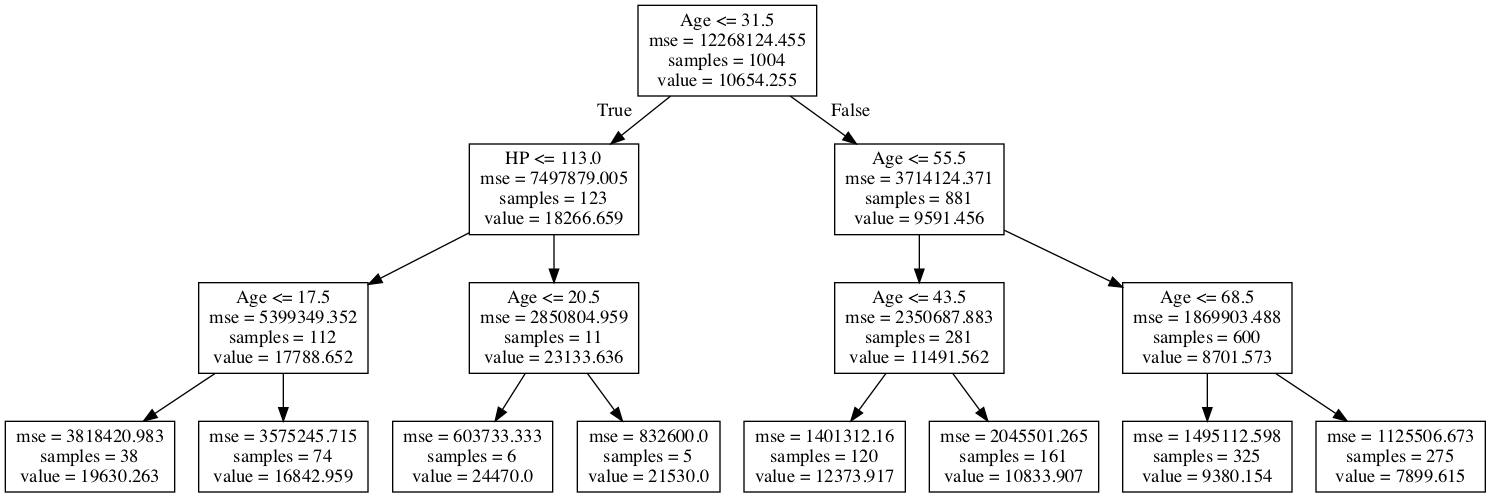

In [69]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=8000,height=8000)
# Double click on the graph to zoom in

In [71]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')

<Figure size 432x288 with 0 Axes>